In [2]:
import numpy as np
import cmath, math 
from IPython.display import display, Markdown
import fractions

# 1. Co-prime Checker:


In [3]:
def iscoprime(p=1,q=1):
    common_factor = np.gcd(p,q)
    if np.gcd(p,q)==1:
        return (True, common_factor)
    else:
        return (False, common_factor)
     

# 2. Plot Periods:

Let $x=5$ and $N=21$. Plot $x^ i mod N$ for $i$ values between $1$ and $50$ and find the order of $x$.

### Modular Exponentiation: 


$ x^i \bmod N = c$

Here : 
* Expression is called Modular exponentiation
* $x$ is called **Base** 
* $i$ Raised to power is called **Exponent**
* $N$ positive integer is called **Modulus**
* $c$ is called the **Remainder** of exponentiation 


Modular exponentiation is the remainder when an integer b (the base) is raised to the power e (the exponent), and divided by a positive integer m (the modulus); that is, c = be mod m. From the definition of division, it follows that 0 ≤ c < m.

Are  36  and  595  co-prime? :  (True, 1)


$36^{0} \mod 595 = 1$

$36^{8} \mod 595 = 1$

$36^{16} \mod 595 = 1$

$36^{24} \mod 595 = 1$

$36^{32} \mod 595 = 1$

$36^{40} \mod 595 = 1$

$36^{48} \mod 595 = 1$

$36^{56} \mod 595 = 1$

$36^{64} \mod 595 = 1$

$36^{72} \mod 595 = 1$

$36^{80} \mod 595 = 1$

$36^{88} \mod 595 = 1$

$36^{96} \mod 595 = 1$

Period or Order of (36,595) is $r=8$

Factors of  595 : 35  and  17


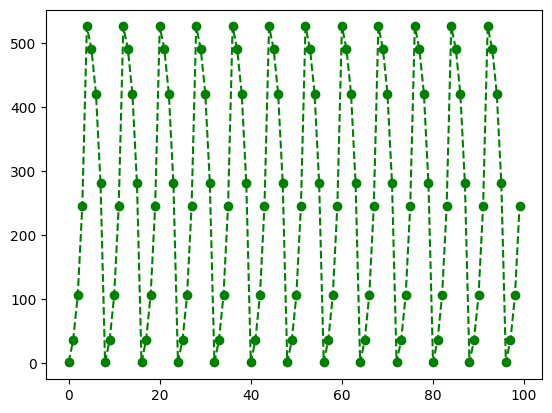

None

In [4]:
import matplotlib.pyplot as plt

# Make Changes to these as per your requirements: 
x = 36
N = 595
iterations = 100
L = int(np.ceil(np.log2(N)))

#Create an empty list
l = []
dd = []
period = []


print("Are ",x," and ",N," co-prime? : ",iscoprime(x,N))

#Append x^i mod N values
for i in range (iterations):
    l.append((x**i) % N)

    if ((x**i) % N==1):
        text = "$" + str(x) + "^{" + str(i) + "} \mod " +  str(N) + " = " +  str((x**i) % N) + "$"
        dd.append(text)
        period.append(i)

for i in dd:
    display(Markdown(i))

# Print Period
display(Markdown("Period or Order of ("+str(x)+","+str(N)+") is $r="+str(period[1])+"$"))

r = period[1]


#Calculate gcd
print("Factors of ",N,":",np.gcd((x**int(r/2)-1),N), " and ",np.gcd((x**int(r/2)+1),N))


plt.plot(l, linestyle='--', marker='o', color='g') 
display(plt.show()) 


# 3. Number of Bits: (Direct Calssical calculation)

In [71]:
display(Markdown("For given $(x="+str(x)+", N="+str(N)+")$ :"   ))
display(Markdown(dd[1]))
print("Randomly chosen : x =", x)
print("Period (exponent) is : r =", r)
print("Number to be factored is : N =", N)
print("Number of Bits required: L =", int(np.ceil(np.log2(N))))

For given $(x=13, N=77)$ :

$13^{10} \mod 77 = 1$

Randomly chosen : x = 13
Period (exponent) is : r = 10
Number to be factored is : N = 77
Number of Bits required: L = 7


# 4. Expression for $r^{th}$ eigen vector $\vert v_r \rangle$ : 

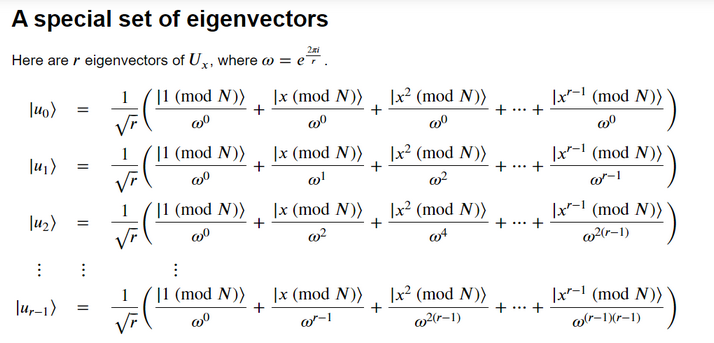

In [72]:
# Input your value of r here: 
rr = 10

text = "$\\vert u_{"+str(rr-1)+ "} \\rangle = \\frac{1}{\sqrt{" + str(rr) + "}} \\big(" 
term = ""

for i in range(rr):

    if i ==0: 
        term = "\\frac{\\vert 1 (mod N)\\rangle}{\\omega^{" + str(i) + "}}"
        text = text + term + " + "
        
    if i < rr-1:
        term = "\\frac{\\vert x^{"+ str(i)+ "} (mod N)\\rangle}{\\omega^{" + str(i) + "}}"
        text = text + term + " + "
    else:
        term = "\\frac{\\vert x^{"+ str(i)+ "} (mod N)\\rangle}{\\omega^{" + str(i) + "}}"
        text = text + term  

text = text + " \\big)$ where $\\omega = e^{\\frac{2 i \\pi}{r}}$"

display(Markdown(text))


$\vert u_{9} \rangle = \frac{1}{\sqrt{10}} \big(\frac{\vert 1 (mod N)\rangle}{\omega^{0}} + \frac{\vert x^{0} (mod N)\rangle}{\omega^{0}} + \frac{\vert x^{1} (mod N)\rangle}{\omega^{1}} + \frac{\vert x^{2} (mod N)\rangle}{\omega^{2}} + \frac{\vert x^{3} (mod N)\rangle}{\omega^{3}} + \frac{\vert x^{4} (mod N)\rangle}{\omega^{4}} + \frac{\vert x^{5} (mod N)\rangle}{\omega^{5}} + \frac{\vert x^{6} (mod N)\rangle}{\omega^{6}} + \frac{\vert x^{7} (mod N)\rangle}{\omega^{7}} + \frac{\vert x^{8} (mod N)\rangle}{\omega^{8}} + \frac{\vert x^{9} (mod N)\rangle}{\omega^{9}} \big)$ where $\omega = e^{\frac{2 i \pi}{r}}$

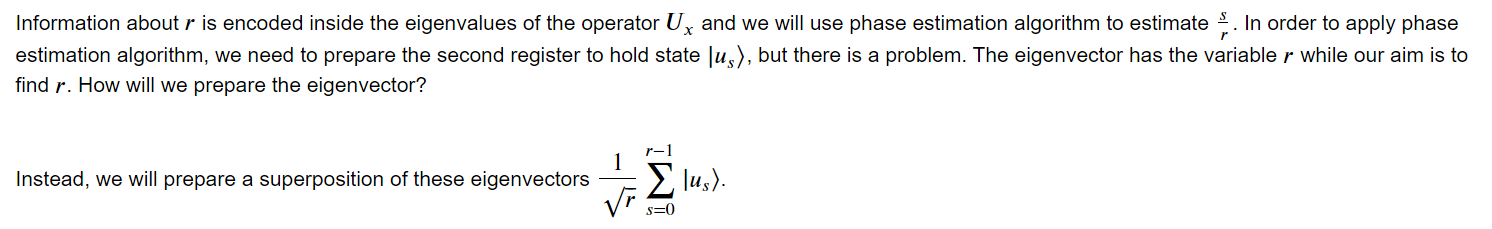

# 5. Input vector:

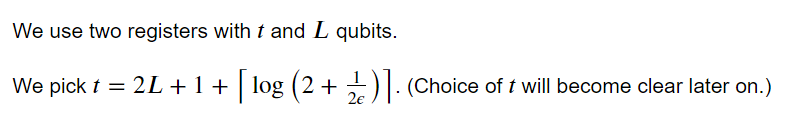

In [44]:
epsilon = 0.001
t = 2 * L + 1 + np.ceil(np.log2(2+(1/(2*epsilon))))
print(t)

24.0


Now, we are ready to implement QPE algorithm.

The first register has $t= 2L + 1 + ceil \big( log_2(2+\frac{1}{2\epsilon}) \big) $ qubits.

The second register has $ L = ceil(log_2(N)) $ qubits.

# 6. Continued fraction render:

In [6]:
# Define Functions: 

def contFrac(N):
    import math
    cf=[]
    while True:
        cf.append(int(N))
        f = N - N//1
        if f < 0.0001:  # or whatever precision you consider close enough to 0
            break
        N = 1/f
        if(math.ceil(N)-N<0.0001):
            N=round(N)
    return cf


def convergents(cf):
    from fractions import Fraction 
    c=[] 
    cv=[]
    
    for i in range(len(cf)):
        c.append(cf[i])
        for j in range(i-1,-1,-1):
            c[i] = 1/c[i]+ cf[j]
        cv.append(Fraction(c[i]).limit_denominator(10000))
    return cv

def contfrac_markdown(x=[0]):
    def surround_fraction(d, text):
        return str(d) + " + \\frac{1}{"+text+"}"

    def final_fraction(p,q):
        return  str(p) + " + \\frac{1}{"+str(q)+"}"

    x_len = len(x)
    i = x_len-1
    t1 = ""
    
    while i!=0:
        if(i==x_len-1):
            t1 = final_fraction(x[i-1],x[i])
        else:
            t1 = surround_fraction(x[i-1], t1)
        i = i -1
        
    return "$"+t1+"$"    



In [7]:
x = contFrac(44/13)
print(x)
display(Markdown( contfrac_markdown(x) ) )

[3, 2, 1, 1, 2]


$3 + \frac{1}{2 + \frac{1}{1 + \frac{1}{1 + \frac{1}{2}}}}$